<a href="https://colab.research.google.com/github/ashamril/Text-Analytics/blob/master/Twitter_Sentiment_Analysis_on_any_keyword_here_in_Malaysia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Twitter Sentiment Analysis on any_keyword_here in Malaysia
Using **Malaya**, a **Natural-Language-Toolkit** library for **Bahasa Malaysia**, powered by **Deep Learning Tensorflow**.<br>
**Malaya** provided basic interface for **Pre-trained Transformer encoder models**, specific to **Malay**, **local social media slang** and **Manglish** language, called **Transformer-Bahasa**.<br>
https://malaya.readthedocs.io/en/latest/

In [1]:
%pip install GetOldTweets3

In [2]:
%pip install malaya

     |████████████████████████████████| 4.0MB 2.8MB/s 
     |████████████████████████████████| 1.1MB 29.9MB/s 
     |████████████████████████████████| 71kB 7.2MB/s 
     |████████████████████████████████| 71kB 5.7MB/s 
     |████████████████████████████████| 1.7MB 44.8MB/s 
     |████████████████████████████████| 81kB 8.1MB/s 
     |████████████████████████████████| 215kB 47.0MB/s 
     |████████████████████████████████| 368kB 45.6MB/s 
     |████████████████████████████████| 110.5MB 82kB/s 
     |████████████████████████████████| 245kB 47.9MB/s 
     |████████████████████████████████| 3.8MB 37.0MB/s 
     |████████████████████████████████| 512kB 37.8MB/s 
  Created wheel for ftfy: filename=ftfy-5.8-cp36-none-any.whl size=45612 sha256=6f6cf0d2dd775e66500727a736f52e5d4147b03bf7e274d4b5d70df37cf5cc73
  Stored in directory: /root/.cache/pip/wheels/ba/c0/ef/f28c4da5ac84a4e06ac256ca9182fc34fa57fefffdbc68425b
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=53

In [3]:
%pip install googletrans

     |████████████████████████████████| 61kB 2.7MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 931kB 8.7MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
     |████████████████████████████████| 71kB 7.4MB/s 
     |████████████████████████████████| 102kB 9.4MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=3d163cc7a254e0bda72ab8e6982a06c7d0df970f255293c35c8ec8979aead97b
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=23dad965f5bb319ab9e409c681a384bd43d6d9f18041e9fc4837c5a92f5156ae
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [4]:
import malaya
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import GetOldTweets3 as got
import warnings
from googletrans import Translator

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
# Change accordingly
keyword = "mco OR pkp" # use OR or AND respectively, eg. mco OR pkp
location = "Kuala Lumpur, Malaysia"
start_date = "2020-07-22"    # yyyy-mm-dd
#latest_date = "2020-07-25"
#number_tweets = 100

In [6]:
# search_tweet = got.manager.TweetCriteria().setQuerySearch(keyword)\
#                                             .setNear(location)\
#                                             .setSince(start_date)\
#                                             .setUntil(latest_date)\
#                                             .setMaxTweets(number_tweets)

In [7]:
# Search tweets usng keyword, location and start_date only
search_tweet = got.manager.TweetCriteria().setQuerySearch(keyword)\
                                             .setNear(location)\
                                             .setSince(start_date)

tweet_df = pd.DataFrame({'got_criteria':got.manager.TweetManager.getTweets(search_tweet)})

In [8]:
print("Number of tweets collected: ")
len(tweet_df)

Number of tweets collected: 


2155

In [9]:
def get_twitter_info():
    tweet_df["username"] = tweet_df["got_criteria"].apply(lambda x: x.username)
    tweet_df["tweet_text"] = tweet_df["got_criteria"].apply(lambda x: x.text)
    tweet_df["date"] = tweet_df["got_criteria"].apply(lambda x: x.date)
    tweet_df["hashtags"] = tweet_df["got_criteria"].apply(lambda x: x.hashtags)
    tweet_df["link"] = tweet_df["got_criteria"].apply(lambda x: x.permalink)

In [10]:
get_twitter_info()
df = tweet_df.drop(["got_criteria"], axis=1)
df

,username,tweet_text,date,hashtags,link
0,LanaZainol,Seronoknya orang dah cuti & balik kampung nk b...,2020-07-29 01:12:03+00:00,#KitaJagaKita #KitaJagaKita,https://twitter.com/LanaZainol/status/12882810...
1,zxmxn,Aku rasa etunai 50 tu dapat after pkp. Pkp hab...,2020-07-29 01:10:07+00:00,,https://twitter.com/zxmxn/status/1288280610935...
2,bernamaradio,Tiada hotel ditutup berikutan pelaksanaan Peri...,2020-07-29 01:09:53+00:00,,https://twitter.com/bernamaradio/status/128828...
3,zuraida_my,Admin | Kes baharu #COVID19 semalam melonjak k...,2020-07-29 01:09:30+00:00,#COVID19,https://twitter.com/zuraida_my/status/12882804...
4,izyanalzaim,"sblm ni, izz punya buku sekolah just tinggal d...",2020-07-29 00:55:20+00:00,,https://twitter.com/izyanalzaim/status/1288276...
...,...,...,...,...,...
2150,gloriouscash,Good to see some things never change. Sour and...,2020-07-22 00:53:54+00:00,#badservice,https://twitter.com/gloriouscash/status/128573...
2151,pittssuda,Harap takde berita yang dok makan situ kene ju...,2020-07-22 00:45:59+00:00,,https://twitter.com/pittssuda/status/128573782...
2152,syahmibaek,Rindu PKP ! smooth je traffic tak ada jem!!!!,2020-07-22 00:42:18+00:00,,https://twitter.com/syahmibaek/status/12857368...
2153,wadehek92,Aku ade 10 mural nk setel under company aku ke...,2020-07-22 00:26:56+00:00,,https://twitter.com/wadehek92/status/128573302...


In [11]:
corpus = df["tweet_text"]
corpus_list = corpus.tolist()

In [12]:
#  Language detection
data = []
for i in corpus_list: 
  t = Translator().detect(i)
  data.append([t.lang, t.confidence, i])
  
detection_df = pd.DataFrame(data)
print(detection_df)

       0         1                                                  2
0     ms  1.000000  Seronoknya orang dah cuti & balik kampung nk b...
1     ms  0.933890  Aku rasa etunai 50 tu dapat after pkp. Pkp hab...
2     ms  1.000000  Tiada hotel ditutup berikutan pelaksanaan Peri...
3     en  1.000000  Admin | Kes baharu #COVID19 semalam melonjak k...
4     ms  0.958546  sblm ni, izz punya buku sekolah just tinggal d...
...   ..       ...                                                ...
2150  en  1.000000  Good to see some things never change. Sour and...
2151  ms  0.967897  Harap takde berita yang dok makan situ kene ju...
2152  ms  0.291947      Rindu PKP ! smooth je traffic tak ada jem!!!!
2153  ms  0.657469  Aku ade 10 mural nk setel under company aku ke...
2154  ms  1.000000  KEPUTUSAN MESYUARAT KHAS MENTERI-MENTERI MENGE...

[2155 rows x 3 columns]


In [13]:
  detection_df.columns = ['Lang','Confidence','Text']
  s = detection_df.Lang
  counts = s.value_counts()
  percent100 = s.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
  detection_df2 = pd.DataFrame({'Counts': counts, 'Percentage': percent100})
  detection_df2.head(10)

,Counts,Percentage
ms,1345,62.41%
en,483,22.41%
msid,93,4.32%
id,79,3.67%
idms,51,2.37%
pl,23,1.07%
ja,21,0.97%
zh-CN,6,0.28%
hi,4,0.19%
jw,4,0.19%


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


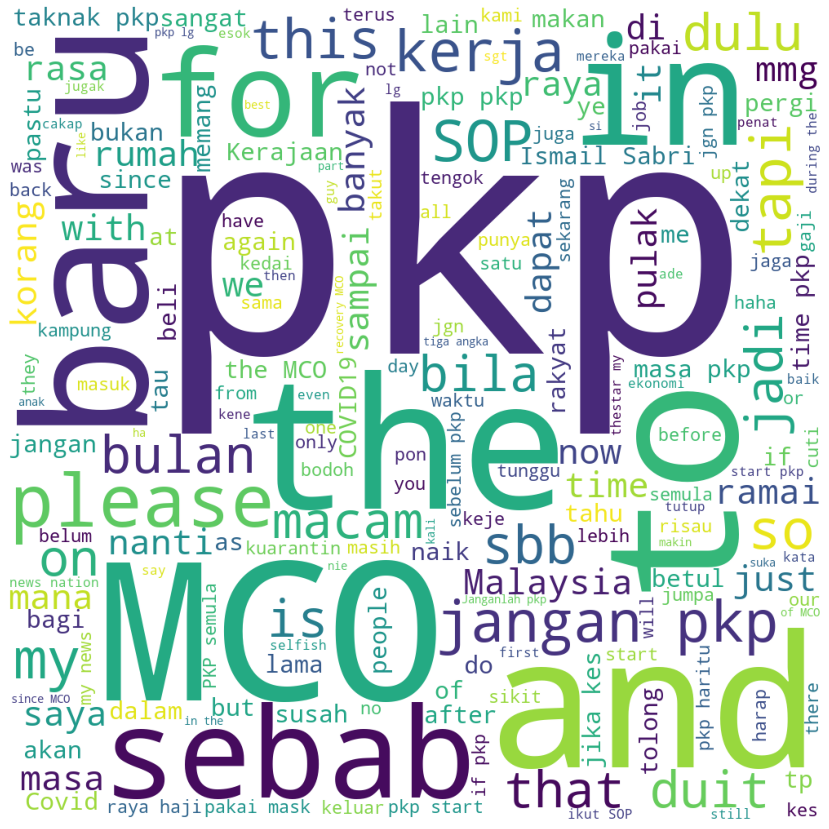

In [14]:
# Word cloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS 

#stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['dpt', 'eh', 'hahaha', 'weh', 'utk', 'dgn', 'takde', 'apa','org', 'kat', 'amp', 'laa', 'kau', 'mcm', 'kg', 'com', 'nk', 'la', 'kan', 'kt', 'igshid', 'https', 'www', 'instagram', 'dh', 'je', 'tu', 'nak', 'yang', 'aku', 'tak', 'dan', 'dah', 'yg', 'ada', 'kita', 'untuk', 'semua', 'ke', 'dia', 'boleh', 'buat', 'kena', 'balik', 'lah', 'ini', 'ni', 'pun', 'kalau', 'lagi', 'dengan', 'dari', 'lepas', 'hari', 'orang', 'habis']
#stopwords.extend(newStopWords)
stopwords = newStopWords


unique_string=(" ").join(corpus_list)
wordcloud = WordCloud(width = 1000, height = 1000, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(unique_string)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [15]:
# Available Transformer models
malaya.sentiment.available_transformer()

{'albert': ['48.6 MB', 'accuracy: 0.992'],
 'alxlnet': ['46.8 MB', 'accuracy: 0.991'],
 'bert': ['425.6 MB', 'accuracy: 0.993'],
 'tiny-albert': ['22.4 MB', 'accuracy: 0.985'],
 'tiny-bert': ['57.4 MB', 'accuracy: 0.987'],
 'xlnet': ['446.5 MB', 'accuracy: 0.993']}

In [16]:
# Using stacking models for better results
# 3 models = BERT-base-bahasa, Multinomial (Complement Naive Bayes) and XLNET-base-bahasa
bert = malaya.sentiment.transformer('bert')
multinomial = malaya.sentiment.multinomial()
xlnet = malaya.sentiment.transformer('xlnet')

downloading frozen /root/Malaya/sentiment/bert/base model


100%|██████████| 426/426 [00:16<00:00, 25.9MB/s]


downloading frozen /root/Malaya/sentiment/bert/base vocab


184%|██████████| 1.00/0.54 [00:00<00:00, 2.86MB/s]


downloading frozen /root/Malaya/sentiment/bert/base tokenizer


135%|██████████| 1.00/0.74 [00:00<00:00, 2.26MB/s]


downloading frozen /root/Malaya/sentiment/multinomial model


3.00MB [00:00, 5.68MB/s]                          


downloading frozen /root/Malaya/sentiment/multinomial vector


117%|██████████| 3.00/2.57 [00:00<00:00, 4.84MB/s]


downloading frozen /root/Malaya/sentiment/multinomial bpe


120%|██████████| 1.00/0.83 [00:00<00:00, 2.29MB/s]


downloading frozen /root/Malaya/sentiment/xlnet/base model


447MB [00:17, 26.2MB/s]


downloading frozen /root/Malaya/sentiment/xlnet/base vocab


184%|██████████| 1.00/0.54 [00:00<00:00, 2.77MB/s]


downloading frozen /root/Malaya/sentiment/xlnet/base tokenizer


135%|██████████| 1.00/0.74 [00:00<00:00, 2.29MB/s]


In [17]:
def cls_corpus(corpus_list):

  data = []
  for i in corpus_list: 
    corpus_result = malaya.stack.predict_stack([bert, multinomial, xlnet], [i])
    for j in corpus_result:
      corpus_result = j.values()
      data.append([corpus_result, i])

  df = pd.DataFrame(data)
  df2 = pd.DataFrame(df[0].values.tolist(), index=df.index)
  df2.columns=['Negative', 'Positive', 'Neutral']
  df2['Classification'] = df2[['Negative','Positive','Neutral']].idxmax(axis=1)
  df2['Text'] = df[1]

  class_count  = df2['Classification'].value_counts().sort_index()
  plt.figure(figsize=(20,9))
  #sns.barplot(class_count.index, class_count.values, alpha=0.8)
  ax = class_count.plot.bar(color=['red', 'yellow', 'green'], figsize=(20, 9))
  plt.xticks(rotation=0)
  plt.title("Twitter Sentiment Analysis on {} in Malaysia".format(keyword), fontweight='bold', fontsize=15)
  plt.ylabel('Number of Sentiment', fontweight='bold', fontsize=15)
  plt.xlabel('Classification', fontweight='bold', fontsize=15)
  plt.grid(True)
  
  i = 0
  label = np.round(class_count.values, 2)
  for p in ax.patches:
      ax.annotate(str(round(p.get_height(),2 )), (p.get_x() * 1.005, p.get_height() * 1.01), fontweight='bold', fontsize=15)
      i = i+1

  pd.options.display.max_columns = None
  pd.set_option('display.expand_frame_repr', False)
  print(df2)
  print("")
  print("Total Number of Tweets: ", df2['Classification'].count())
  print("")
  s = df2.Classification
  counts = s.value_counts()
  percent100 = s.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
  df3 = pd.DataFrame({'Counts': counts, 'Percentage': percent100})
  print(df3)
  print("")
  plt.show()

      Negative  Positive   Neutral Classification                                               Text
0     0.209129  0.000648  0.033239       Negative  Seronoknya orang dah cuti & balik kampung nk b...
1     0.216036  0.000009  0.000867       Negative  Aku rasa etunai 50 tu dapat after pkp. Pkp hab...
2     0.134277  0.013318  0.311695        Neutral  Tiada hotel ditutup berikutan pelaksanaan Peri...
3     0.210928  0.000025  0.001316       Negative  Admin | Kes baharu #COVID19 semalam melonjak k...
4     0.898729  0.000002  0.000251       Negative  sblm ni, izz punya buku sekolah just tinggal d...
...        ...       ...       ...            ...                                                ...
2150  0.000106  0.849555  0.010537       Positive  Good to see some things never change. Sour and...
2151  0.991423  0.000001  0.000130       Negative  Harap takde berita yang dok makan situ kene ju...
2152  0.733926  0.000014  0.001363       Negative      Rindu PKP ! smooth je traffic tak ad

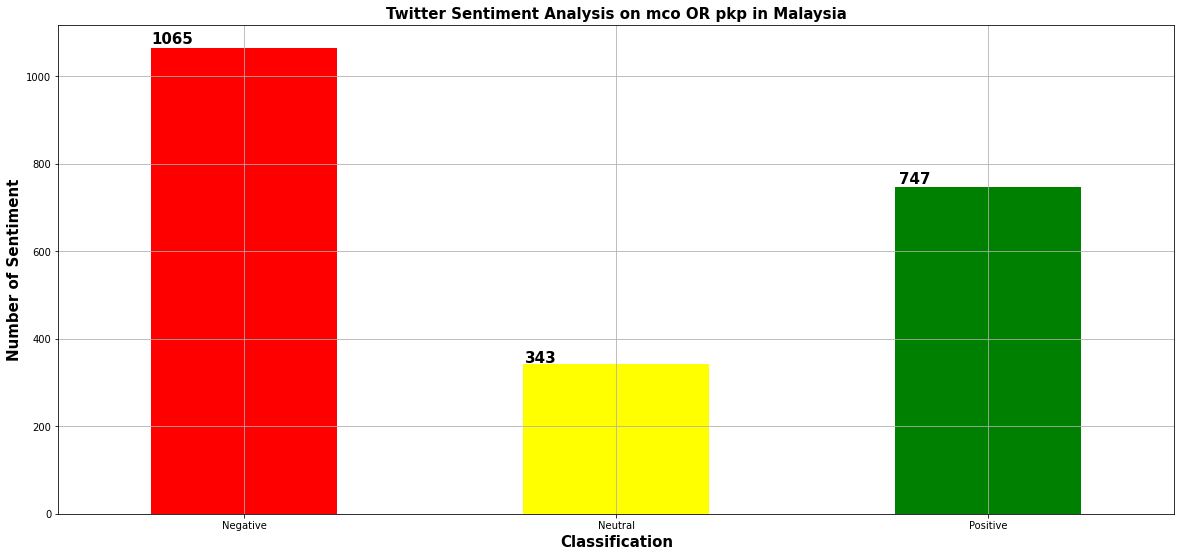

In [18]:
cls_corpus(corpus_list)